In [129]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
from random import gauss
import pandas as pd
import random
import numpy as np
from scipy import signal
from sklearn import preprocessing

In [126]:
white_noise = [gauss(0.0, 1.0) for i in range(1000)]

In [127]:
white_noise = pd.DataFrame(white_noise)

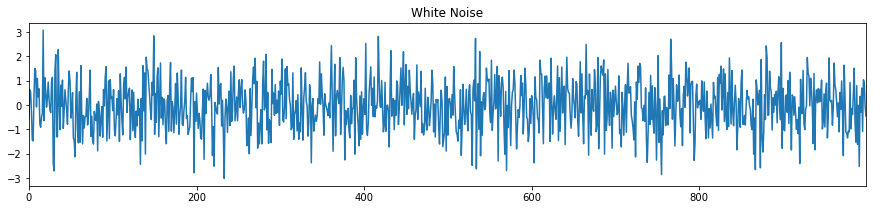

In [130]:
white_noise.plot(figsize=(15,3), title="White Noise", legend=False)
white_noise.to_csv('white_noise_complete.csv', index = True)

In [120]:
xlim = 100
# define functions
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal = pd.DataFrame(y)+white_noise

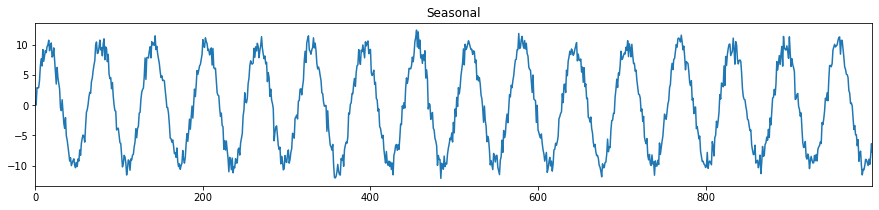

In [131]:
seasonal.plot(figsize=(15,3), title="Seasonal", legend=False)
seasonal.to_csv('seasonal_complete.csv', index = True)

In [37]:
xlim = 100
x = np.arange(0, xlim, 0.1)
trend = pd.DataFrame(x)+white_noise

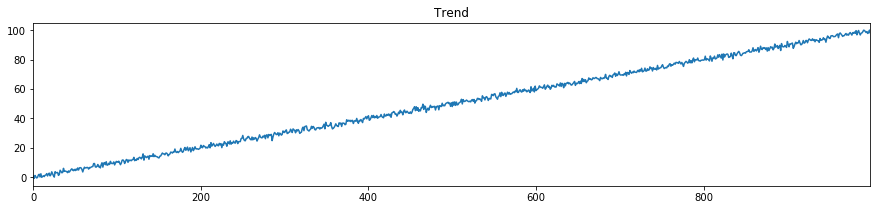

In [132]:
trend.plot(figsize=(15,3), title="Trend", legend=False)
trend.to_csv('trend_complete.csv', index = True)

In [113]:
xlim = 100
# define functions
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal_and_trend = pd.DataFrame(y)+white_noise*3+pd.DataFrame(x)

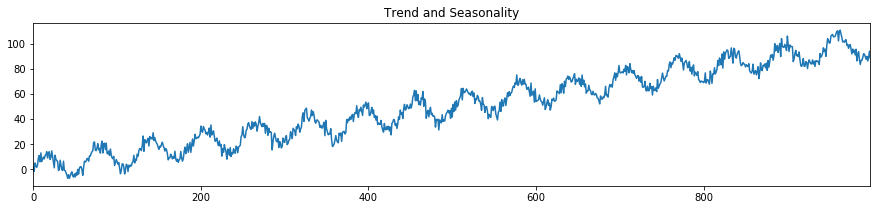

In [133]:
seasonal_and_trend.plot(figsize=(15,3), title="Trend and Seasonality", legend=False);
seasonal_and_trend.to_csv('seasonal_and_trend_complete.csv', index = True)

In [41]:
def remove_random_points(df_input, num_missing=200):
    df = df_input.copy()
    missing_places = random.sample(range(df.shape[0]), num_missing)
    for missing_place in missing_places:
        df[0][missing_place] = np.nan
    return df

In [42]:
white_noise_missing = remove_random_points(white_noise, num_missing=200)

In [43]:
white_noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


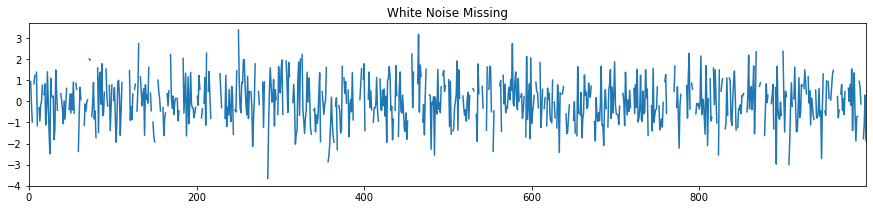

In [134]:
white_noise_missing.plot(figsize=(15,3), title="White Noise Missing", legend=False)
white_noise_missing.to_csv('white_noise_missing.csv', index = True)

In [45]:
seasonal_missing = remove_random_points(seasonal, num_missing=200)

In [46]:
seasonal_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    800 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


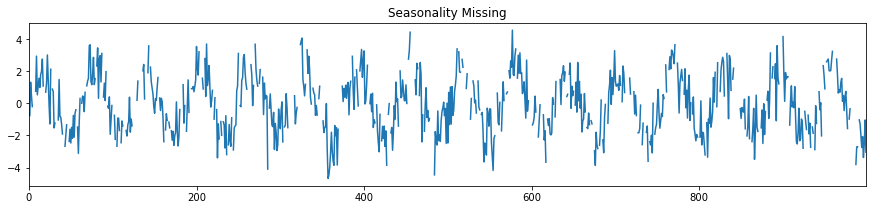

In [135]:
seasonal_missing.plot(figsize=(15,3), title="Seasonality Missing", legend=False)
seasonal_missing.to_csv('seasonal_missing.csv', index = True)

In [48]:
trend_missing = remove_random_points(trend, num_missing=200)

In [49]:
trend_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    800 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


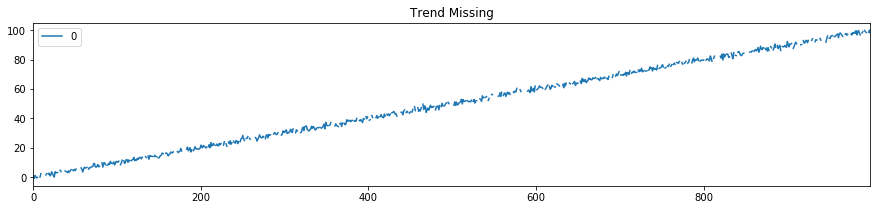

In [50]:
trend_missing.plot(figsize=(15,3), title="Trend Missing", legend=False)
trend_missing.to_csv('trend_missing.csv', index = True)

In [51]:
seasonal_and_trend_missing = remove_random_points(seasonal_and_trend, num_missing=200)

In [52]:
seasonal_and_trend_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    800 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


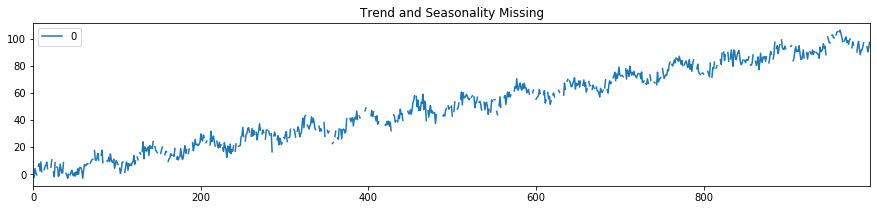

In [53]:
seasonal_and_trend_missing.plot(figsize=(15,3), title="Trend and Seasonality Missing", legend=False)
seasonal_and_trend_missing.to_csv('seasonal_and_trend_missing.csv', index = True)

In [142]:
seasonal_scaled = preprocessing.scale(seasonal)
trend_scaled = preprocessing.scale(trend)
seasonal_and_trend_scaled = preprocessing.scale(seasonal_and_trend)
white_noise_scaled = preprocessing.scale(white_noise)

In [143]:
seasonal_scaled_ac = signal.correlate(seasonal_scaled, seasonal_scaled, mode='full')
trend_scaled_ac = signal.correlate(trend_scaled, trend_scaled, mode='full')
seasonal_and_trend_scaled_ac = signal.correlate(seasonal_and_trend_scaled, seasonal_and_trend_scaled, mode='full')
white_noise_scaled_ac = signal.correlate(white_noise_scaled, white_noise_scaled, mode='full')

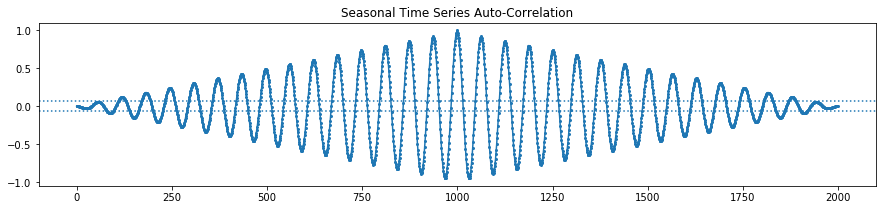

In [160]:
#fig, (ax_orig, ax_corr) = plt.subplots(1, 1)
#ax_orig.plot(seasonal_scaled)
plt.figure(figsize=(15,3))
#ax_orig.set_title('Seasonal Time Series')
plt.plot(seasonal_scaled_ac/len(seasonal_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.title('Seasonal Time Series Auto-Correlation')
plt.show()

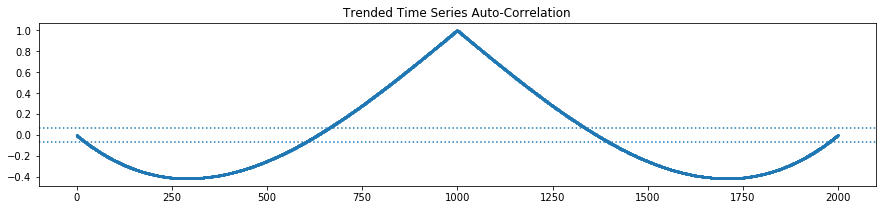

In [162]:
#fig, (ax_orig, ax_corr) = plt.subplots(2, 1)
#ax_orig.plot(trend_scaled)
#ax_orig.set_title('Trended Time Series')
plt.figure(figsize=(15,3))
plt.plot(trend_scaled_ac/len(trend_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(trend_scaled)), ls=':')
plt.title('Trended Time Series Auto-Correlation')
plt.show()

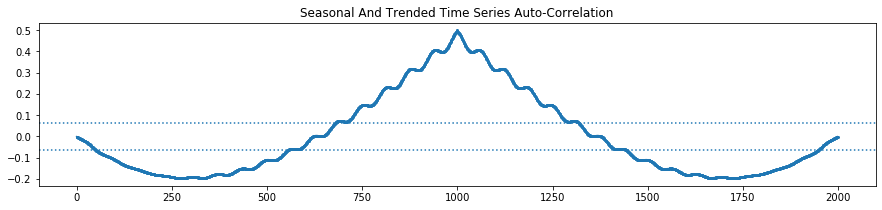

In [165]:
#fig, (ax_orig, ax_corr) = plt.subplots(2, 1)
#ax_orig.plot(seasonal_and_trend_scaled)
#ax_orig.set_title('Seasonal And Trended Time Series')
plt.figure(figsize=(15,3))
plt.plot(seasonal_and_trend_scaled_ac/len(seasonal_and_trend_scaled_ac), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.title('Seasonal And Trended Time Series Auto-Correlation')
#fig.tight_layout()
plt.show()

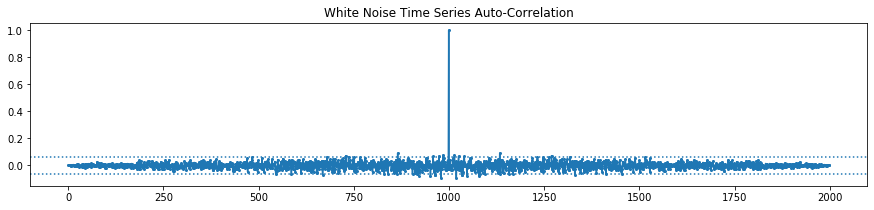

In [166]:
#fig, (ax_orig, ax_corr) = plt.subplots(2, 1)
#ax_orig.plot(white_noise_scaled)
#ax_orig.set_title('White Noise Time Series')
plt.figure(figsize=(15,3))
plt.plot(white_noise_scaled_ac/len(white_noise_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.title('White Noise Time Series Auto-Correlation')
fig.tight_layout()
plt.show()